In [22]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import re

In [23]:
# Read json file
df = pd.read_json('logins.json').set_index('login_time')
df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [24]:
#Check date column properties, etc. 
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [25]:
# Add a counter column

df.index = pd.to_datetime(df.index)
df['logged'] = 1

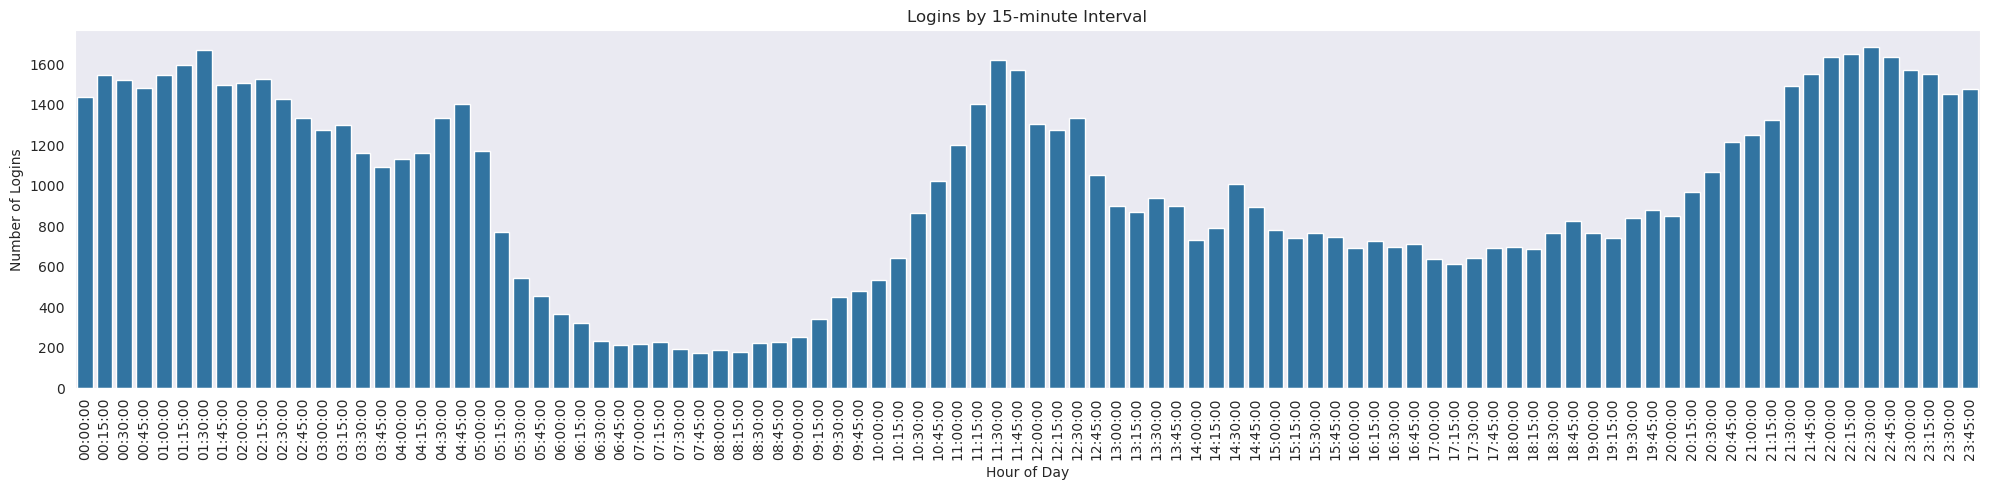

In [ ]:
# Count total logins by quarter hour

logins_by_quarter = df.groupby(df.index.floor('15min').time).sum()

# PLot logins by quarter hour

plt.figure(figsize=(20, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_quarter.index,
            y=logins_by_quarter['logged'] )
plt.title('Logins by 15-minute Interval')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

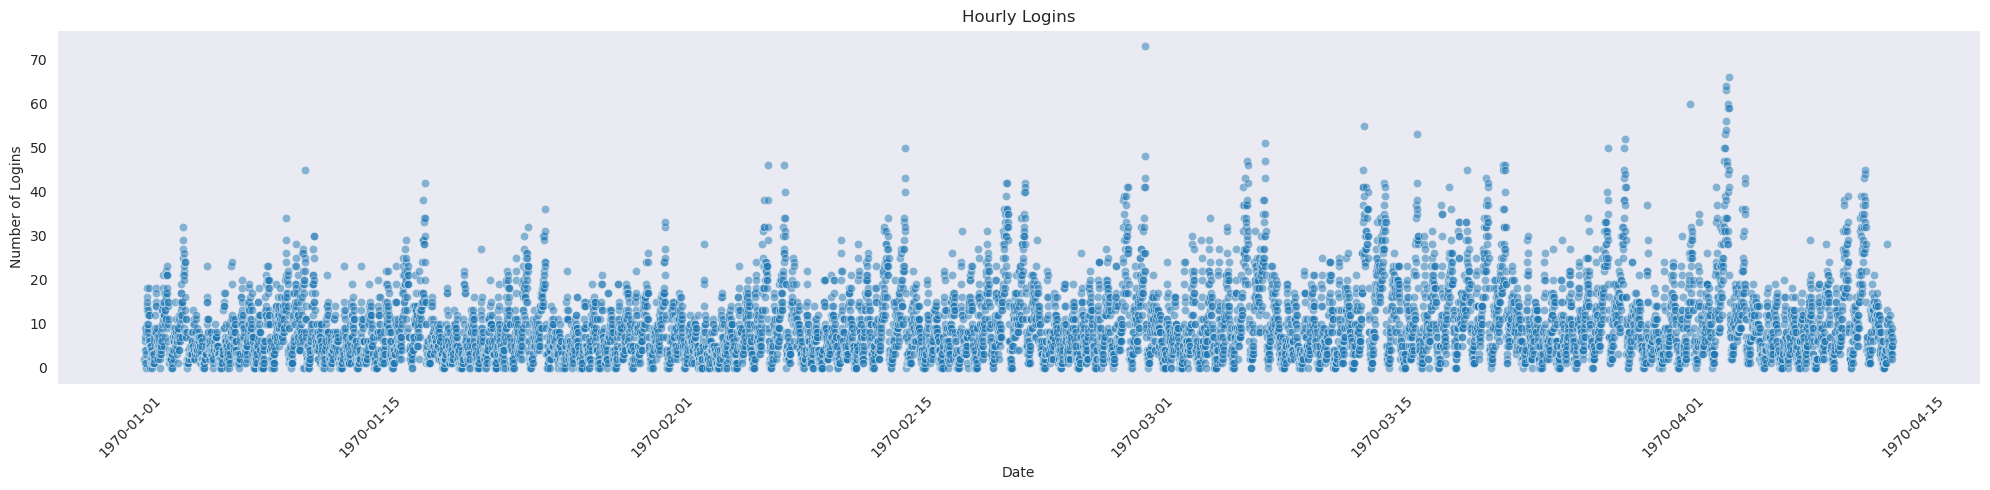

In [ ]:
# Quarter hourly logins

logins_quarterhourly = df.resample('15min').count()


# Plot the hourly counts

plt.figure(figsize=(20, 5))
sns.scatterplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'], marker='o', alpha=0.5)
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hourly

Average logins per hour:  38.0


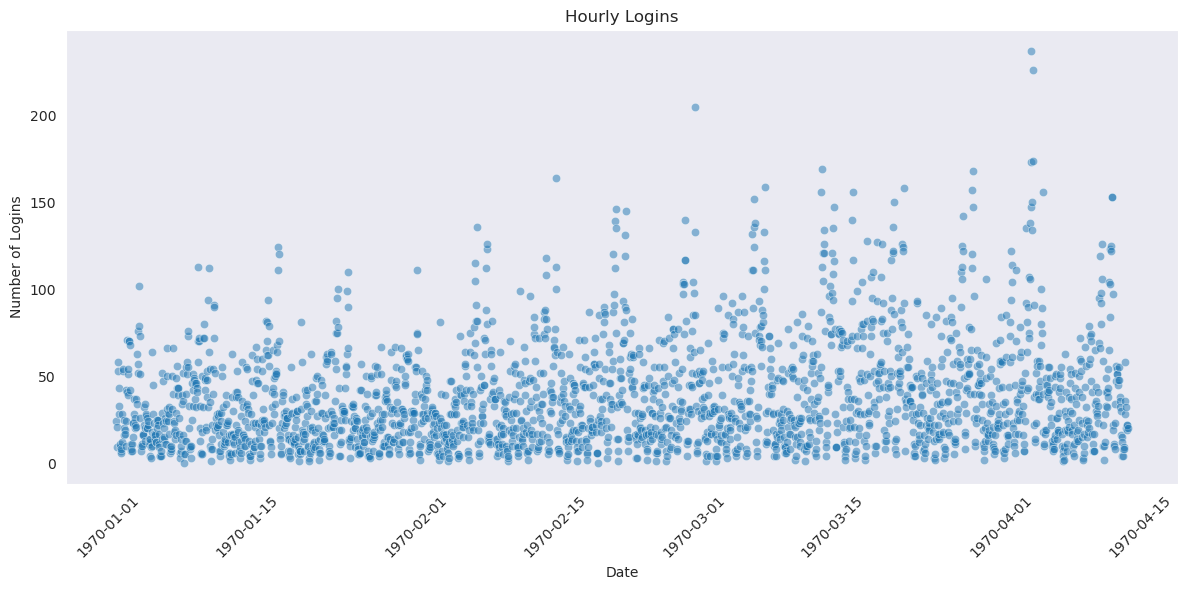

In [28]:
# Resample to hourly - Logins per hour

logins_hourly = df.resample('h').count()

avg_logins_hourly = round(logins_hourly['logged'].mean(),0)
print('Average logins per hour: ', avg_logins_hourly)

# Plot the hourly counts
sns.set_style('dark', {'axes.grid': False})
plt.figure(figsize=(12, 6))
sns.scatterplot(x=logins_hourly.index, y=logins_hourly['logged'], marker='o', alpha=0.5)
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

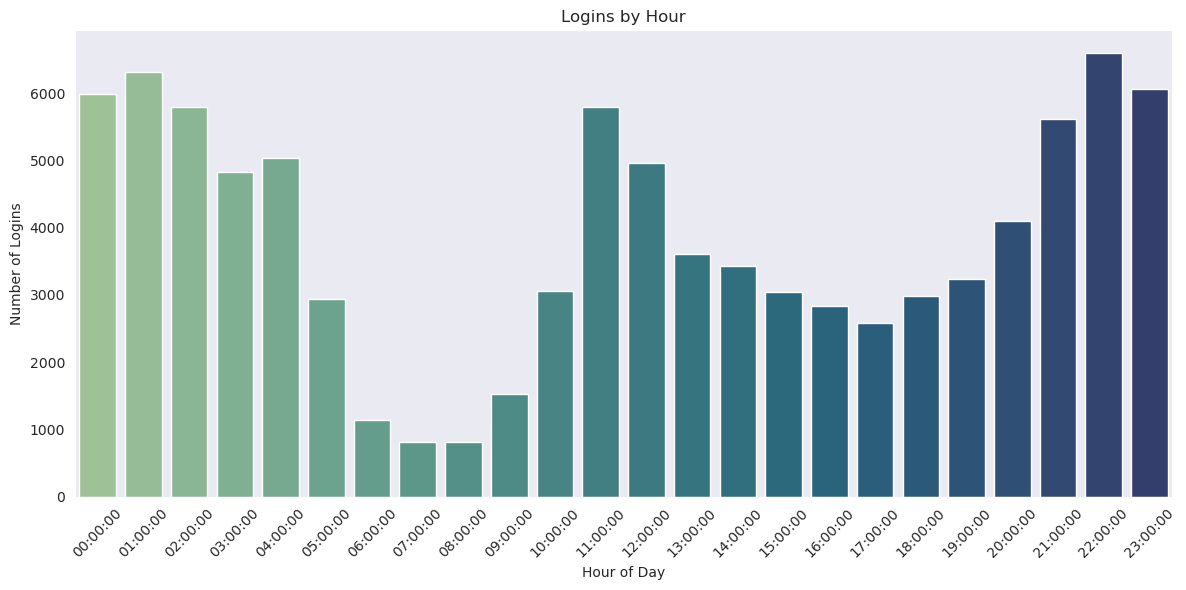

In [ ]:
# Total logins by hour

logins_by_hour = logins_hourly.groupby(logins_hourly.index.hour).sum()

# convert index to time

logins_by_hour.index = pd.to_datetime(logins_by_hour.index, format='%H').time

# Logins by hour of day

plt.figure(figsize=(12, 6))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_hour.index, y=logins_by_hour['logged'], palette='crest', hue=logins_by_hour.index, legend=False)
plt.title('Logins by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


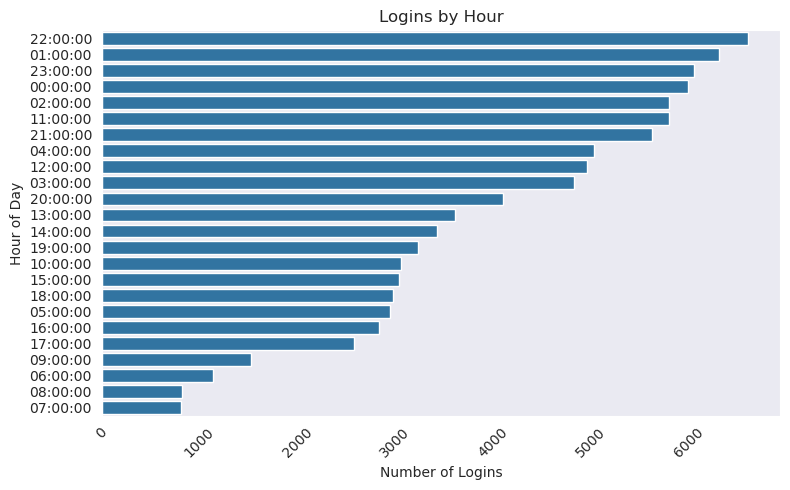

In [30]:
#  Total logins by hour of day - sorted

plt.figure(figsize=(8, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(y=logins_by_hour.sort_values('logged', ascending=False).index,
            x=logins_by_hour.sort_values('logged', ascending=False)['logged'] )
plt.title('Logins by Hour')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Custom Daily

In [31]:
# Check if there are 24 hours per day

daily_hour_count = logins_hourly.groupby(logins_hourly.index.date)['logged'].agg({'count', 'sum'})
daily_hour_count['count'].value_counts()

count
24    101
4       1
19      1
Name: count, dtype: int64

In [32]:
# Get the average number of logins per day

avg_login_daily = round(daily_hour_count['sum'].mean(),0)
print('Average daily logins: ', avg_login_daily)

Average daily logins:  904.0


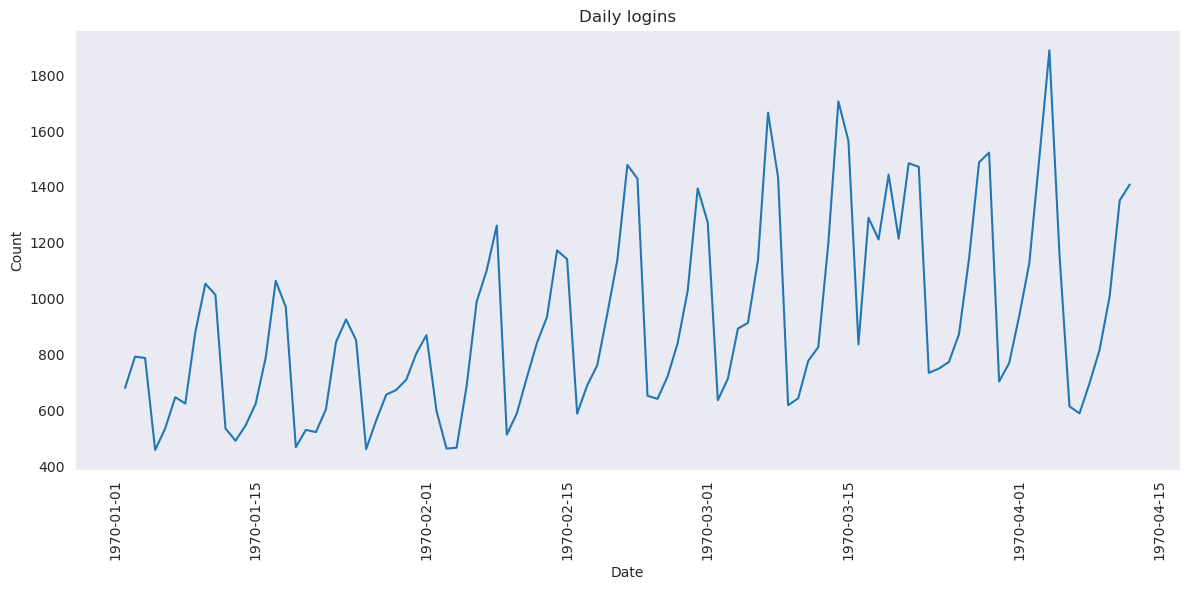

In [33]:
# Drop incomplete daily logins dates with less than 24 hours of logins recorded. 

daily_hour_count = daily_hour_count[daily_hour_count['count'] == 24]

# Plot complete daily logins (with 24 hours of data)

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_hour_count, x=daily_hour_count.index, y='sum', markers='o',)
plt.title('Daily logins')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

### Standard Daily


In [41]:
# Resample to daily

logins_daily = df.resample('D').count()

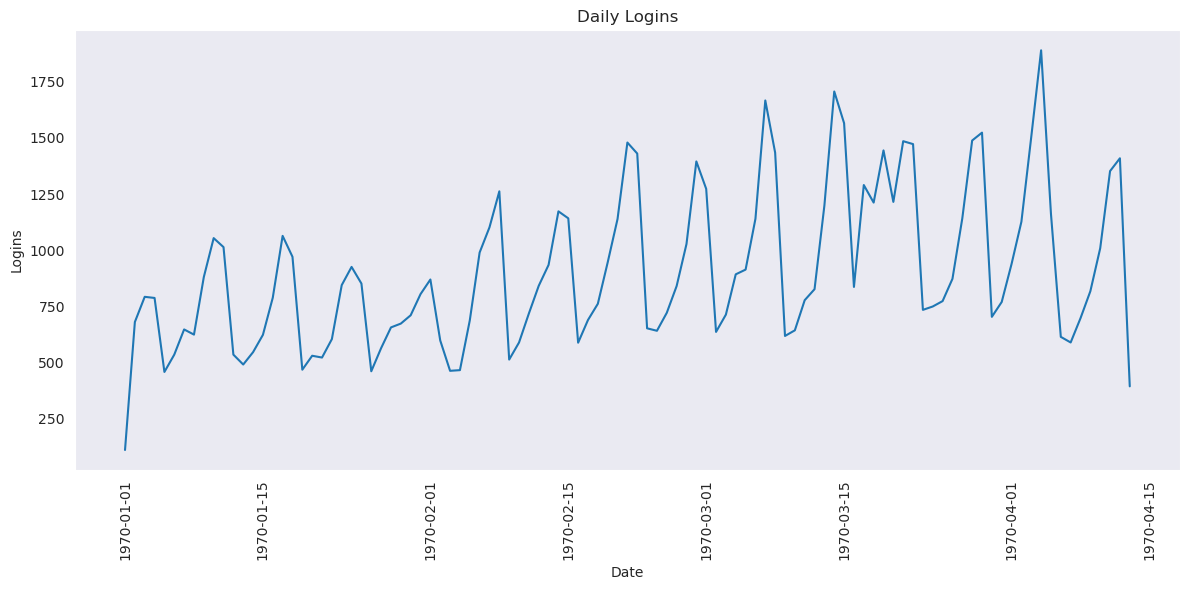

In [42]:
# Plot daily logins

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(x=logins_daily.index, y=logins_daily['logged'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Logins')
plt.title('Daily Logins')
plt.tight_layout()
plt.show()

### Standard Weekly

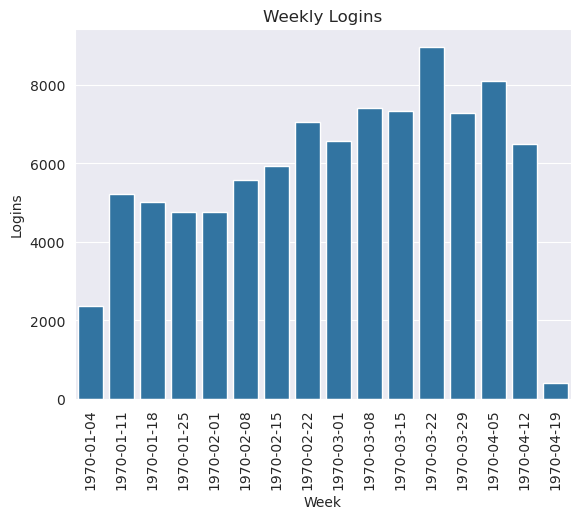

In [43]:
# Resample to weekly

weekly_counts = df.resample('W').count()

# Plot weekly logins

sns.set_style('darkgrid')
sns.barplot(x=weekly_counts.index, y=weekly_counts['logged'])
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Logins')
plt.title('Weekly Logins')
plt.show()